In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.rcParams['font.sans-serif'] = ['SimHei']  
# Matplotlib中设置字体-黑体，解决Matplotlib中文乱码问题
plt.rcParams['axes.unicode_minus'] = False    
# 解决Matplotlib坐标轴负号'-'显示为方块的问题
sns.set(font='SimHei')                        
# Seaborn中设置字体-黑体，解决Seaborn中文乱码问题

In [2]:
data=pd.read_excel('附件2 慢性病及相关因素流调数据.xlsx')
data.head()

,Q1-ID,Q2-出生年,Q3-性别,Q4-民族,Q5-民族_其他,Q6-文化程度,Q7-婚姻状况,Q8-职业,Q9-是否吸烟,Q10-开始吸烟年龄,...,Q225-臀围,Q226-收缩压,Q227-舒张压,Q228-脉搏,Q229-胆固醇,Q230-血糖,Q231-高密度脂蛋白,Q232-低密度脂蛋白,Q233-甘油三酯,Q234-尿酸
0,10001,1983,2,1,NaN,4,1.0,9.0,3.0,NaN,...,92.0,98.0,62.0,70.0,3.79,4.61,1.59,1.88,0.91,210.4
1,10002,1994,2,1,NaN,3,1.0,13.0,3.0,NaN,...,88.0,104.0,70.0,80.0,4.24,4.59,1.59,2.17,0.81,270.6
2,10003,1976,1,1,NaN,4,2.0,4.0,1.0,16.0,...,95.0,104.0,70.0,80.0,4.84,4.13,1.33,2.92,1.59,298.2
3,10004,1984,1,1,NaN,5,2.0,12.0,3.0,NaN,...,106.0,126.0,82.0,72.0,5.20,4.68,0.92,3.60,1.84,327.9
4,10005,1968,1,1,NaN,4,2.0,9.0,1.0,20.0,...,97.0,106.0,70.0,70.0,5.10,4.41,1.37,3.15,1.87,350.9


In [3]:
data=data[data.columns[:199]]

In [4]:
data['Q2-出生年']=2023-data['Q2-出生年']

In [5]:

# 处理缺失值并生成新的标记列
for col in data.columns:
    if data[col].isnull().sum()>=1:
        new_col = col + "_Missing"
        data[new_col] = data[col].isna().astype(int)

In [6]:
# 处理定类变量（分类变量）列，采用众数填充
for col in data.columns:
    if data[col].dtype == 'object':  # 假设定类变量的类型为'object'
        mode_value = data[col].mode().iloc[0]  # 获取众数
        data[col] = data[col].fillna(mode_value)

# 处理定量变量（数值型变量）列，采用均值填充
for col in data.columns:
    if data[col].dtype == 'float64':  # 假设定量变量的类型为'float64'
        mean_value = data[col].mean()  # 获取均值
        data[col] = data[col].fillna(mean_value)

In [7]:
data

,Q1-ID,Q2-出生年,Q3-性别,Q4-民族,Q5-民族_其他,Q6-文化程度,Q7-婚姻状况,Q8-职业,Q9-是否吸烟,Q10-开始吸烟年龄,...,Q190-盐_Missing,Q191-酱油_Missing,Q192-醋_Missing,Q193-酱类_Missing,Q194-味精_Missing,Q195-工作主要属于以下何种活动_Missing,Q196-您做休闲、家务活动的强度_Missing,Q197-是否参加体育锻炼_Missing,Q198-体育锻炼的强度_Missing,Q199-平均每天体育锻炼时间_Missing
0,10001,40,2,1,壮族,4,1.0,9.0,3.0,24.724359,...,0,0,0,0,0,0,0,0,1,1
1,10002,29,2,1,壮族,3,1.0,13.0,3.0,24.724359,...,0,0,0,0,0,0,0,0,0,0
2,10003,47,1,1,壮族,4,2.0,4.0,1.0,16.000000,...,0,0,0,0,0,0,0,0,1,1
3,10004,39,1,1,壮族,5,2.0,12.0,3.0,24.724359,...,0,0,0,0,0,1,0,0,1,1
4,10005,55,1,1,壮族,4,2.0,9.0,1.0,20.000000,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7704,17705,60,2,1,壮族,3,2.0,10.0,3.0,24.724359,...,0,0,0,0,0,0,0,0,0,0
7705,17706,52,1,1,壮族,5,2.0,4.0,1.0,21.000000,...,0,0,0,0,0,0,0,0,0,0
7706,17707,70,2,1,壮族,3,2.0,10.0,3.0,24.724359,...,0,0,0,0,0,1,0,0,1,1
7707,17708,60,2,1,壮族,3,2.0,2.0,3.0,24.724359,...,0,0,0,0,0,1,0,0,1,1


In [8]:
from sklearn import preprocessing


for col in data.columns:
    if data[col].dtype == 'object':  
        data[col]=data[col].astype('str')
        enc=preprocessing.LabelEncoder()
        enc=enc.fit(data[col].unique())#训练LabelEncoder,将电脑，手表，手机编码为0,1,2
        data[col]=enc.transform(data[col])#使用训练好的LabelEncoder对原数据进行编码


In [9]:
data.shape

(7709, 393)

In [10]:
for i in  data.columns:
    if data[col].nunique()==1:
        del data[col]

In [11]:
data.shape

(7709, 393)

In [12]:
data.columns[:20]

Index(['Q1-ID', 'Q2-出生年', 'Q3-性别', 'Q4-民族', 'Q5-民族_其他', 'Q6-文化程度', 'Q7-婚姻状况',
       'Q8-职业', 'Q9-是否吸烟', 'Q10-开始吸烟年龄', 'Q11-平均每周吸烟天数', 'Q12-一天吸烟支数',
       'Q13-被动吸烟天数', 'Q14-被动吸烟天数.1', 'Q15-是否饮酒', 'Q16-饮酒年数', 'Q17-是否饮用高度白酒',
       'Q18-饮用频率', 'Q19-平均每次饮用量', 'Q20-是否饮用低度白酒'],
      dtype='object')

In [13]:
data.columns[8:]

Index(['Q9-是否吸烟', 'Q10-开始吸烟年龄', 'Q11-平均每周吸烟天数', 'Q12-一天吸烟支数', 'Q13-被动吸烟天数',
       'Q14-被动吸烟天数.1', 'Q15-是否饮酒', 'Q16-饮酒年数', 'Q17-是否饮用高度白酒', 'Q18-饮用频率',
       ...
       'Q190-盐_Missing', 'Q191-酱油_Missing', 'Q192-醋_Missing',
       'Q193-酱类_Missing', 'Q194-味精_Missing', 'Q195-工作主要属于以下何种活动_Missing',
       'Q196-您做休闲、家务活动的强度_Missing', 'Q197-是否参加体育锻炼_Missing',
       'Q198-体育锻炼的强度_Missing', 'Q199-平均每天体育锻炼时间_Missing'],
      dtype='object', length=385)

In [14]:
del data['Q5-民族_其他_Missing']
del data['Q8-职业_Missing']
del data['Q7-婚姻状况_Missing']

In [15]:
#'Q2-出生年', 'Q3-性别', 'Q4-民族', 'Q5-民族_其他', 'Q6-文化程度', 'Q7-婚姻状况','Q8-职业'

In [16]:
data.to_csv('./Q2/数据清洗.csv',index=None)

In [17]:
data

,Q1-ID,Q2-出生年,Q3-性别,Q4-民族,Q5-民族_其他,Q6-文化程度,Q7-婚姻状况,Q8-职业,Q9-是否吸烟,Q10-开始吸烟年龄,...,Q190-盐_Missing,Q191-酱油_Missing,Q192-醋_Missing,Q193-酱类_Missing,Q194-味精_Missing,Q195-工作主要属于以下何种活动_Missing,Q196-您做休闲、家务活动的强度_Missing,Q197-是否参加体育锻炼_Missing,Q198-体育锻炼的强度_Missing,Q199-平均每天体育锻炼时间_Missing
0,10001,40,2,1,4,4,1.0,9.0,3.0,24.724359,...,0,0,0,0,0,0,0,0,1,1
1,10002,29,2,1,4,3,1.0,13.0,3.0,24.724359,...,0,0,0,0,0,0,0,0,0,0
2,10003,47,1,1,4,4,2.0,4.0,1.0,16.000000,...,0,0,0,0,0,0,0,0,1,1
3,10004,39,1,1,4,5,2.0,12.0,3.0,24.724359,...,0,0,0,0,0,1,0,0,1,1
4,10005,55,1,1,4,4,2.0,9.0,1.0,20.000000,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7704,17705,60,2,1,4,3,2.0,10.0,3.0,24.724359,...,0,0,0,0,0,0,0,0,0,0
7705,17706,52,1,1,4,5,2.0,4.0,1.0,21.000000,...,0,0,0,0,0,0,0,0,0,0
7706,17707,70,2,1,4,3,2.0,10.0,3.0,24.724359,...,0,0,0,0,0,1,0,0,1,1
7707,17708,60,2,1,4,3,2.0,2.0,3.0,24.724359,...,0,0,0,0,0,1,0,0,1,1


In [18]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from lightgbm import LGBMRegressor,LGBMClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from math import sqrt
# 分离X和Y
X = data[data.columns[8:]]
Y = data['Q2-出生年']

In [19]:

# 构建xgboost回归模型
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
xgb_model.fit(X, Y)
xgb_y_pred = xgb_model.predict(X)

# 输出xgboost模型评价结果
print('XGBoost模型评价结果：')
print('R2 Score:', r2_score(Y, xgb_y_pred))
print('MAE:', mean_absolute_error(Y, xgb_y_pred))
print('MSE:', mean_squared_error(Y, xgb_y_pred))
print('RMSE:', sqrt(mean_squared_error(Y, xgb_y_pred)))
# 构建决策树回归模型
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X, Y)
tree_y_pred = tree_model.predict(X)

# 输出决策树模型评价结果
print('决策树模型评价结果：')
print('R2 Score:', r2_score(Y, tree_y_pred))
print('MAE:', mean_absolute_error(Y, tree_y_pred))
print('MSE:', mean_squared_error(Y, tree_y_pred))
print('MSE:', mean_squared_error(Y, tree_y_pred))
print('RMSE:', sqrt(mean_squared_error(Y, tree_y_pred)))

# 构建随机森林回归模型
rf_model = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)
rf_model.fit(X, Y)
rf_y_pred = rf_model.predict(X)

# 输出随机森林模型评价结果
print('随机森林模型评价结果：')
print('R2 Score:', r2_score(Y, rf_y_pred))
print('MAE:', mean_absolute_error(Y, rf_y_pred))
print('MSE:', mean_squared_error(Y, rf_y_pred))
print('RMSE:', sqrt(mean_squared_error(Y, rf_y_pred)))

# 构建LGBM回归模型
lgbm_model = LGBMRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
lgbm_model.fit(X, Y)
lgbm_y_pred = lgbm_model.predict(X)


# 输出LGBM模型评价结果
print('LGBM模型评价结果：')
print('R2 Score:', r2_score(Y, lgbm_y_pred))
print('MAE:', mean_absolute_error(Y, lgbm_y_pred))
print('MSE:', mean_squared_error(Y, lgbm_y_pred))
print('RMSE:', sqrt(mean_squared_error(Y, lgbm_y_pred)))

# 构建Adaboost回归模型
ada_model = AdaBoostRegressor(n_estimators=100)
ada_model.fit(X, Y)
ada_y_pred = ada_model.predict(X)
# 输出Adaboost模型评价结果
print('Adaboost模型评价结果：')
print('R2 Score:', r2_score(Y, ada_y_pred))
print('MAE:', mean_absolute_error(Y, ada_y_pred))
print('MSE:', mean_squared_error(Y, ada_y_pred))
print('RMSE:', sqrt(mean_squared_error(Y, ada_y_pred)))

# 构建GBDT回归模型
gbdt_model = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
gbdt_model.fit(X, Y)
gbdt_y_pred = gbdt_model.predict(X)

# 输出GBDT模型评价结果
print('GBDT模型评价结果：')
print('R2 Score:', r2_score(Y, gbdt_y_pred))
print('MAE:', mean_absolute_error(Y, gbdt_y_pred))
print('MSE:', mean_squared_error(Y, gbdt_y_pred))
print('RMSE:', sqrt(mean_squared_error(Y, gbdt_y_pred)))


XGBoost模型评价结果：
R2 Score: 0.4806894724218793
MAE: 6.81474141175219
MSE: 76.77342223823942
RMSE: 8.762044409739055
决策树模型评价结果：
R2 Score: 1.0
MAE: 0.0
MSE: 0.0
MSE: 0.0
RMSE: 0.0
随机森林模型评价结果：
R2 Score: 0.2973813543489442
MAE: 7.960346571976002
MSE: 103.87318394371235
RMSE: 10.191819461887674
LGBM模型评价结果：
R2 Score: 0.4772134528400558
MAE: 6.828324916686293
MSE: 77.287307293311
RMSE: 8.791319997208099
Adaboost模型评价结果：
R2 Score: 0.09717540780104994
MAE: 9.534191086591058
MSE: 133.4710735544052
RMSE: 11.552968170751843
GBDT模型评价结果：
R2 Score: 0.4836497035008106
MAE: 6.815447133038952
MSE: 76.33578991908458
RMSE: 8.737035533811486


In [ ]:
import sys
!{sys.executable} -m pip install shap -i https://pypi.tuna.tsinghua.edu.cn/simple

In [20]:
import shap
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

# 初始化SHAP模型
explainer = shap.Explainer(tree_model)

# 计算SHAP值
shap_values = explainer(X)

In [21]:
shap_df = pd.DataFrame(shap_values.values, columns=X.columns)

In [22]:
# 输出每个特征的SHAP值（绝对值）
features=[]
abs_mean_shap_values=[]
for i, feature in enumerate(X.columns):
    abs_mean_shap_value = np.abs(shap_df.values[:, i]).mean()
    features.append(feature)
    abs_mean_shap_values.append(abs_mean_shap_value)


In [23]:
tt=pd.DataFrame(features,columns=['features'])
tt['shap_values']=abs_mean_shap_values

In [24]:
tt1=pd.read_excel('./Q2/归类.xlsx')
tt1

,features,归类
0,Q9-是否吸烟,吸烟情况
1,Q10-开始吸烟年龄,吸烟情况
2,Q11-平均每周吸烟天数,吸烟情况
3,Q12-一天吸烟支数,吸烟情况
4,Q13-被动吸烟天数,吸烟情况
...,...,...
377,Q195-工作主要属于以下何种活动_Missing,身体活动情况
378,Q196-您做休闲、家务活动的强度_Missing,身体活动情况
379,Q197-是否参加体育锻炼_Missing,身体活动情况
380,Q198-体育锻炼的强度_Missing,身体活动情况


In [25]:
tt['归类']=tt1['归类']

In [26]:
a=tt.groupby('归类').sum()
a

,shap_values
归类,
吸烟情况,0.734135
身体活动情况,5.743515
饮酒情况,1.045381
饮食情况,19.568862


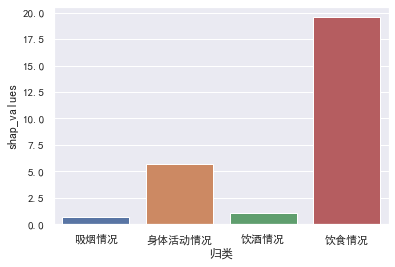

In [27]:


# 使用Seaborn绘制柱状图
sns.barplot(x='归类', y='shap_values', data=a.reset_index())
plt.savefig('./Q2/年龄归类')
# 显示图形
plt.show()

In [28]:
tt.to_excel('./Q2/年龄shape值.xlsx',index=None)  

In [29]:
Y = data['Q3-性别']
dd='性别'
##'Q2-出生年', 'Q3-性别',  'Q6-文化程度', 'Q7-婚姻状况','Q8-职业'
#年龄、性别、婚姻状况、文化程度、职业
# 构建xgboost回归模型
xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
xgb_model.fit(X, Y)
xgb_y_pred = xgb_model.predict(X)

# 输出xgboost模型评价结果
print('XGBoost模型评价结果：')
print('R2 Score:', r2_score(Y, xgb_y_pred))
print('MAE:', mean_absolute_error(Y, xgb_y_pred))
print('MSE:', mean_squared_error(Y, xgb_y_pred))
print('RMSE:', sqrt(mean_squared_error(Y, xgb_y_pred)))
# 构建决策树回归模型
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X, Y)
tree_y_pred = tree_model.predict(X)

# 输出决策树模型评价结果
print('决策树模型评价结果：')
print('R2 Score:', r2_score(Y, tree_y_pred))
print('MAE:', mean_absolute_error(Y, tree_y_pred))
print('MSE:', mean_squared_error(Y, tree_y_pred))
print('MSE:', mean_squared_error(Y, tree_y_pred))
print('RMSE:', sqrt(mean_squared_error(Y, tree_y_pred)))

# 构建随机森林回归模型
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf_model.fit(X, Y)
rf_y_pred = rf_model.predict(X)

# 输出随机森林模型评价结果
print('随机森林模型评价结果：')
print('R2 Score:', r2_score(Y, rf_y_pred))
print('MAE:', mean_absolute_error(Y, rf_y_pred))
print('MSE:', mean_squared_error(Y, rf_y_pred))
print('RMSE:', sqrt(mean_squared_error(Y, rf_y_pred)))

# 构建LGBM回归模型
lgbm_model = LGBMClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
lgbm_model.fit(X, Y)
lgbm_y_pred = lgbm_model.predict(X)


# 输出LGBM模型评价结果
print('LGBM模型评价结果：')
print('R2 Score:', r2_score(Y, lgbm_y_pred))
print('MAE:', mean_absolute_error(Y, lgbm_y_pred))
print('MSE:', mean_squared_error(Y, lgbm_y_pred))
print('RMSE:', sqrt(mean_squared_error(Y, lgbm_y_pred)))

# 构建Adaboost回归模型
ada_model = AdaBoostClassifier(n_estimators=100)
ada_model.fit(X, Y)
ada_y_pred = ada_model.predict(X)
# 输出Adaboost模型评价结果
print('Adaboost模型评价结果：')
print('R2 Score:', r2_score(Y, ada_y_pred))
print('MAE:', mean_absolute_error(Y, ada_y_pred))
print('MSE:', mean_squared_error(Y, ada_y_pred))
print('RMSE:', sqrt(mean_squared_error(Y, ada_y_pred)))

# 构建GBDT回归模型
gbdt_model = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
gbdt_model.fit(X, Y)
gbdt_y_pred = gbdt_model.predict(X)

# 输出GBDT模型评价结果
print('GBDT模型评价结果：')
print('R2 Score:', r2_score(Y, gbdt_y_pred))
print('MAE:', mean_absolute_error(Y, gbdt_y_pred))
print('MSE:', mean_squared_error(Y, gbdt_y_pred))
print('RMSE:', sqrt(mean_squared_error(Y, gbdt_y_pred)))


[12:58:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost模型评价结果：
R2 Score: 0.5599552755789521
MAE: 0.10857439356596187
MSE: 0.10857439356596187
RMSE: 0.32950628759700756
决策树模型评价结果：
R2 Score: 1.0
MAE: 0.0
MSE: 0.0
MSE: 0.0
RMSE: 0.0
随机森林模型评价结果：
R2 Score: 0.17879347724530847
MAE: 0.2026203139187962
MSE: 0.2026203139187962
RMSE: 0.45013366228132307
LGBM模型评价结果：
R2 Score: 0.5746760071008032
MAE: 0.10494227526267999
MSE: 0.10494227526267999
RMSE: 0.3239479514716523
Adaboost模型评价结果：
R2 Score: 0.5268336296547873
MAE: 0.11674665974834608
MSE: 0.11674665974834608
RMSE: 0.3416821033480479
GBDT模型评价结果：
R2 Score: 0.569944343397351
MAE: 0.10610974186016345
MSE: 0.10610974186016345
RMSE: 0.3257449030455633


In [30]:
# 初始化SHAP模型
explainer = shap.Explainer(tree_model)

# 计算SHAP值
shap_values = explainer(X)

In [31]:
shap_values.values.mean(axis=2)

array([[ 3.05311332e-15, -1.51788304e-18,  4.18739208e-17, ...,
         0.00000000e+00,  0.00000000e+00, -1.08420217e-19],
       [ 4.63518113e-15, -6.50521303e-18,  4.18773089e-17, ...,
         0.00000000e+00,  0.00000000e+00, -8.67361738e-19],
       [ 7.77156117e-16, -5.20417043e-18, -4.55364912e-17, ...,
         0.00000000e+00,  0.00000000e+00, -5.42101086e-20],
       ...,
       [ 1.32949207e-14, -3.57786717e-18, -9.23333675e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.74700271e-16, -2.16840434e-18,  2.31036707e-17, ...,
         0.00000000e+00,  0.00000000e+00,  2.16840434e-19],
       [ 2.43971510e-14, -8.67361738e-19,  7.70867745e-17, ...,
         0.00000000e+00,  0.00000000e+00, -8.67361738e-19]])

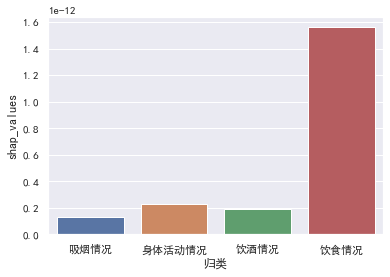

In [32]:

# 初始化SHAP模型
explainer = shap.Explainer(tree_model)

# 计算SHAP值
shap_values = explainer(X)


shap_df = pd.DataFrame(shap_values.values.mean(axis=2), columns=X.columns)
# 输出每个特征的SHAP值（绝对值）
features=[]
abs_mean_shap_values=[]
for i, feature in enumerate(X.columns):
    abs_mean_shap_value = np.abs(shap_df.values[:, i]).mean()
    features.append(feature)
    abs_mean_shap_values.append(abs_mean_shap_value)
tt=pd.DataFrame(features,columns=['features'])
tt['shap_values']=abs_mean_shap_values
tt['归类']=tt1['归类']
a=tt.groupby('归类').sum()

# 使用Seaborn绘制柱状图
sns.barplot(x='归类', y='shap_values', data=a.reset_index())
plt.savefig('./Q2/%s归类'%dd)
# 显示图形
plt.show()


tt.to_excel('./Q2/%sshape值.xlsx'%dd,index=None)  

In [33]:
Y = data['Q6-文化程度']
dd='文化程度'
##'Q2-出生年', 'Q3-性别',  'Q6-文化程度', 'Q7-婚姻状况','Q8-职业'
#年龄、性别、婚姻状况、文化程度、职业
# 构建xgboost回归模型
xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
xgb_model.fit(X, Y)
xgb_y_pred = xgb_model.predict(X)

# 输出xgboost模型评价结果
print('XGBoost模型评价结果：')
print('R2 Score:', r2_score(Y, xgb_y_pred))
print('MAE:', mean_absolute_error(Y, xgb_y_pred))
print('MSE:', mean_squared_error(Y, xgb_y_pred))
print('RMSE:', sqrt(mean_squared_error(Y, xgb_y_pred)))
# 构建决策树回归模型
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X, Y)
tree_y_pred = tree_model.predict(X)

# 输出决策树模型评价结果
print('决策树模型评价结果：')
print('R2 Score:', r2_score(Y, tree_y_pred))
print('MAE:', mean_absolute_error(Y, tree_y_pred))
print('MSE:', mean_squared_error(Y, tree_y_pred))
print('MSE:', mean_squared_error(Y, tree_y_pred))
print('RMSE:', sqrt(mean_squared_error(Y, tree_y_pred)))

# 构建随机森林回归模型
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf_model.fit(X, Y)
rf_y_pred = rf_model.predict(X)

# 输出随机森林模型评价结果
print('随机森林模型评价结果：')
print('R2 Score:', r2_score(Y, rf_y_pred))
print('MAE:', mean_absolute_error(Y, rf_y_pred))
print('MSE:', mean_squared_error(Y, rf_y_pred))
print('RMSE:', sqrt(mean_squared_error(Y, rf_y_pred)))

# 构建LGBM回归模型
lgbm_model = LGBMClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
lgbm_model.fit(X, Y)
lgbm_y_pred = lgbm_model.predict(X)


# 输出LGBM模型评价结果
print('LGBM模型评价结果：')
print('R2 Score:', r2_score(Y, lgbm_y_pred))
print('MAE:', mean_absolute_error(Y, lgbm_y_pred))
print('MSE:', mean_squared_error(Y, lgbm_y_pred))
print('RMSE:', sqrt(mean_squared_error(Y, lgbm_y_pred)))

# 构建Adaboost回归模型
ada_model = AdaBoostClassifier(n_estimators=100)
ada_model.fit(X, Y)
ada_y_pred = ada_model.predict(X)
# 输出Adaboost模型评价结果
print('Adaboost模型评价结果：')
print('R2 Score:', r2_score(Y, ada_y_pred))
print('MAE:', mean_absolute_error(Y, ada_y_pred))
print('MSE:', mean_squared_error(Y, ada_y_pred))
print('RMSE:', sqrt(mean_squared_error(Y, ada_y_pred)))

# 构建GBDT回归模型
gbdt_model = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
gbdt_model.fit(X, Y)
gbdt_y_pred = gbdt_model.predict(X)

# 输出GBDT模型评价结果
print('GBDT模型评价结果：')
print('R2 Score:', r2_score(Y, gbdt_y_pred))
print('MAE:', mean_absolute_error(Y, gbdt_y_pred))
print('MSE:', mean_squared_error(Y, gbdt_y_pred))
print('RMSE:', sqrt(mean_squared_error(Y, gbdt_y_pred)))


[12:59:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost模型评价结果：
R2 Score: 0.29582784161338693
MAE: 0.5382021014398755
MSE: 0.7563886366584511
RMSE: 0.8697060633676479
决策树模型评价结果：
R2 Score: 1.0
MAE: 0.0
MSE: 0.0
MSE: 0.0
RMSE: 0.0
随机森林模型评价结果：
R2 Score: 0.1779626338299305
MAE: 0.6606563756648074
MSE: 0.8829939032299909
RMSE: 0.9396775527966978
LGBM模型评价结果：
R2 Score: 0.3777055166924683
MAE: 0.4751589051757686
MSE: 0.6684394863146971
RMSE: 0.8175814860395856
Adaboost模型评价结果：
R2 Score: -0.25062714324331425
MAE: 0.8403165131664289
MSE: 1.343364898170969
RMSE: 1.1590361936414966
GBDT模型评价结果：
R2 Score: 0.40137516907521165
MAE: 0.46166818004929305
MSE: 0.643014658191724
RMSE: 0.8018819477901494


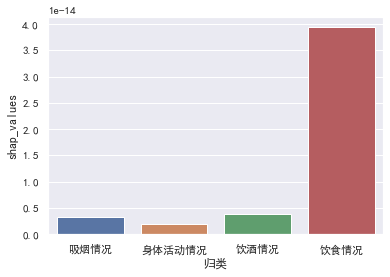

In [159]:

# 初始化SHAP模型
explainer = shap.Explainer(tree_model)

# 计算SHAP值
shap_values = explainer(X)


shap_df = pd.DataFrame(shap_values.values.mean(axis=2), columns=X.columns)
# 输出每个特征的SHAP值（绝对值）
features=[]
abs_mean_shap_values=[]
for i, feature in enumerate(X.columns):
    abs_mean_shap_value = np.abs(shap_df.values[:, i]).mean()
    features.append(feature)
    abs_mean_shap_values.append(abs_mean_shap_value)
tt=pd.DataFrame(features,columns=['features'])
tt['shap_values']=abs_mean_shap_values
tt['归类']=tt1['归类']
a=tt.groupby('归类').sum()

# 使用Seaborn绘制柱状图
sns.barplot(x='归类', y='shap_values', data=a.reset_index())
plt.savefig('./Q2/%s归类'%dd)
# 显示图形
plt.show()


tt.to_excel('./Q2/%sshape值.xlsx'%dd,index=None)  

In [19]:
Y = data['Q7-婚姻状况']
dd='婚姻状况'
##'Q2-出生年', 'Q3-性别',  'Q6-文化程度', 'Q7-婚姻状况','Q8-职业'
#年龄、性别、婚姻状况、文化程度、职业
# 构建xgboost回归模型
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
xgb_model.fit(X, Y)
xgb_y_pred = xgb_model.predict(X)

# 输出xgboost模型评价结果
print('XGBoost模型评价结果：')
print('R2 Score:', r2_score(Y, xgb_y_pred))
print('MAE:', mean_absolute_error(Y, xgb_y_pred))
print('MSE:', mean_squared_error(Y, xgb_y_pred))
print('RMSE:', sqrt(mean_squared_error(Y, xgb_y_pred)))
# 构建决策树回归模型
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X, Y)
tree_y_pred = tree_model.predict(X)

# 输出决策树模型评价结果
print('决策树模型评价结果：')
print('R2 Score:', r2_score(Y, tree_y_pred))
print('MAE:', mean_absolute_error(Y, tree_y_pred))
print('MSE:', mean_squared_error(Y, tree_y_pred))
print('MSE:', mean_squared_error(Y, tree_y_pred))
print('RMSE:', sqrt(mean_squared_error(Y, tree_y_pred)))

# 构建随机森林回归模型
rf_model = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)
rf_model.fit(X, Y)
rf_y_pred = rf_model.predict(X)

# 输出随机森林模型评价结果
print('随机森林模型评价结果：')
print('R2 Score:', r2_score(Y, rf_y_pred))
print('MAE:', mean_absolute_error(Y, rf_y_pred))
print('MSE:', mean_squared_error(Y, rf_y_pred))
print('RMSE:', sqrt(mean_squared_error(Y, rf_y_pred)))

# 构建LGBM回归模型
lgbm_model = LGBMRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
lgbm_model.fit(X, Y)
lgbm_y_pred = lgbm_model.predict(X)


# 输出LGBM模型评价结果
print('LGBM模型评价结果：')
print('R2 Score:', r2_score(Y, lgbm_y_pred))
print('MAE:', mean_absolute_error(Y, lgbm_y_pred))
print('MSE:', mean_squared_error(Y, lgbm_y_pred))
print('RMSE:', sqrt(mean_squared_error(Y, lgbm_y_pred)))

# 构建Adaboost回归模型
ada_model = AdaBoostRegressor(n_estimators=100)
ada_model.fit(X, Y)
ada_y_pred = ada_model.predict(X)
# 输出Adaboost模型评价结果
print('Adaboost模型评价结果：')
print('R2 Score:', r2_score(Y, ada_y_pred))
print('MAE:', mean_absolute_error(Y, ada_y_pred))
print('MSE:', mean_squared_error(Y, ada_y_pred))
print('RMSE:', sqrt(mean_squared_error(Y, ada_y_pred)))

# 构建GBDT回归模型
gbdt_model = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
gbdt_model.fit(X, Y)
gbdt_y_pred = gbdt_model.predict(X)

# 输出GBDT模型评价结果
print('GBDT模型评价结果：')
print('R2 Score:', r2_score(Y, gbdt_y_pred))
print('MAE:', mean_absolute_error(Y, gbdt_y_pred))
print('MSE:', mean_squared_error(Y, gbdt_y_pred))
print('RMSE:', sqrt(mean_squared_error(Y, gbdt_y_pred)))


XGBoost模型评价结果：
R2 Score: 0.20684156686549615
MAE: 0.21614442350186988
MSE: 0.2272166055864113
RMSE: 0.47667243006745347
决策树模型评价结果：
R2 Score: 1.0
MAE: 0.0
MSE: 0.0
MSE: 0.0
RMSE: 0.0
随机森林模型评价结果：
R2 Score: 0.07691434286896115
MAE: 0.20969077635717528
MSE: 0.2644369408643087
RMSE: 0.5142343248600862
LGBM模型评价结果：
R2 Score: 0.19535061249175367
MAE: 0.2192273150389321
MSE: 0.23050842666361004
RMSE: 0.4801129311564208
Adaboost模型评价结果：
R2 Score: -0.10538394705806553
MAE: 0.3437242931301455
MSE: 0.3166600490240908
RMSE: 0.5627255539106881
GBDT模型评价结果：
R2 Score: 0.2343826642207385
MAE: 0.21368551844092065
MSE: 0.21932688974432826
RMSE: 0.4683234883542873


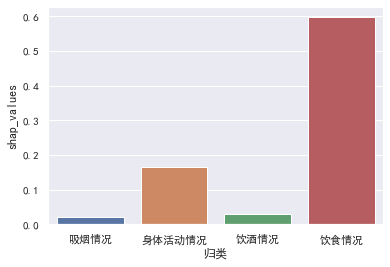

In [26]:

# 初始化SHAP模型
explainer = shap.Explainer(tree_model)

# 计算SHAP值
shap_values = explainer(X)


shap_df = pd.DataFrame(shap_values.values, columns=X.columns)
# 输出每个特征的SHAP值（绝对值）
features=[]
abs_mean_shap_values=[]
for i, feature in enumerate(X.columns):
    abs_mean_shap_value = np.abs(shap_df.values[:, i]).mean()
    features.append(feature)
    abs_mean_shap_values.append(abs_mean_shap_value)
tt=pd.DataFrame(features,columns=['features'])
tt['shap_values']=abs_mean_shap_values
tt['归类']=tt1['归类']
a=tt.groupby('归类').sum()

# 使用Seaborn绘制柱状图
sns.barplot(x='归类', y='shap_values', data=a.reset_index())
plt.savefig('./Q2/%s归类'%dd)
# 显示图形
plt.show()


tt.to_excel('./Q2/%sshape值.xlsx'%dd,index=None)  

In [27]:
Y = data['Q8-职业']
dd='职业'
##'Q2-出生年', 'Q3-性别',  'Q6-文化程度', 'Q7-婚姻状况','Q8-职业'
#年龄、性别、婚姻状况、文化程度、职业
# 构建xgboost回归模型
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
xgb_model.fit(X, Y)
xgb_y_pred = xgb_model.predict(X)

# 输出xgboost模型评价结果
print('XGBoost模型评价结果：')
print('R2 Score:', r2_score(Y, xgb_y_pred))
print('MAE:', mean_absolute_error(Y, xgb_y_pred))
print('MSE:', mean_squared_error(Y, xgb_y_pred))
print('RMSE:', sqrt(mean_squared_error(Y, xgb_y_pred)))
# 构建决策树回归模型
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X, Y)
tree_y_pred = tree_model.predict(X)

# 输出决策树模型评价结果
print('决策树模型评价结果：')
print('R2 Score:', r2_score(Y, tree_y_pred))
print('MAE:', mean_absolute_error(Y, tree_y_pred))
print('MSE:', mean_squared_error(Y, tree_y_pred))
print('MSE:', mean_squared_error(Y, tree_y_pred))
print('RMSE:', sqrt(mean_squared_error(Y, tree_y_pred)))

# 构建随机森林回归模型
rf_model = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)
rf_model.fit(X, Y)
rf_y_pred = rf_model.predict(X)

# 输出随机森林模型评价结果
print('随机森林模型评价结果：')
print('R2 Score:', r2_score(Y, rf_y_pred))
print('MAE:', mean_absolute_error(Y, rf_y_pred))
print('MSE:', mean_squared_error(Y, rf_y_pred))
print('RMSE:', sqrt(mean_squared_error(Y, rf_y_pred)))

# 构建LGBM回归模型
lgbm_model = LGBMRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
lgbm_model.fit(X, Y)
lgbm_y_pred = lgbm_model.predict(X)


# 输出LGBM模型评价结果
print('LGBM模型评价结果：')
print('R2 Score:', r2_score(Y, lgbm_y_pred))
print('MAE:', mean_absolute_error(Y, lgbm_y_pred))
print('MSE:', mean_squared_error(Y, lgbm_y_pred))
print('RMSE:', sqrt(mean_squared_error(Y, lgbm_y_pred)))

# 构建Adaboost回归模型
ada_model = AdaBoostRegressor(n_estimators=100)
ada_model.fit(X, Y)
ada_y_pred = ada_model.predict(X)
# 输出Adaboost模型评价结果
print('Adaboost模型评价结果：')
print('R2 Score:', r2_score(Y, ada_y_pred))
print('MAE:', mean_absolute_error(Y, ada_y_pred))
print('MSE:', mean_squared_error(Y, ada_y_pred))
print('RMSE:', sqrt(mean_squared_error(Y, ada_y_pred)))

# 构建GBDT回归模型
gbdt_model = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
gbdt_model.fit(X, Y)
gbdt_y_pred = gbdt_model.predict(X)

# 输出GBDT模型评价结果
print('GBDT模型评价结果：')
print('R2 Score:', r2_score(Y, gbdt_y_pred))
print('MAE:', mean_absolute_error(Y, gbdt_y_pred))
print('MSE:', mean_squared_error(Y, gbdt_y_pred))
print('RMSE:', sqrt(mean_squared_error(Y, gbdt_y_pred)))


XGBoost模型评价结果：
R2 Score: 0.2743760462950777
MAE: 2.6330884690611813
MSE: 10.248219502175683
RMSE: 3.2012840395965623
决策树模型评价结果：
R2 Score: 1.0
MAE: 0.0
MSE: 0.0
MSE: 0.0
RMSE: 0.0
随机森林模型评价结果：
R2 Score: 0.13889521222439216
MAE: 2.8699716724592395
MSE: 12.161658713774312
RMSE: 3.4873569811211342
LGBM模型评价结果：
R2 Score: 0.2713032748698664
MAE: 2.6365050825591503
MSE: 10.291617237166092
RMSE: 3.2080550551956075
Adaboost模型评价结果：
R2 Score: 0.11928074526851684
MAE: 3.1012186289879495
MSE: 12.438680112745004
RMSE: 3.526851302896821
GBDT模型评价结果：
R2 Score: 0.2756139968788486
MAE: 2.6280663116476153
MSE: 10.230735529588292
RMSE: 3.1985520989329363


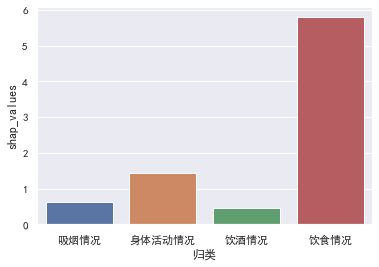

In [30]:


# 初始化SHAP模型
explainer = shap.Explainer(tree_model)

# 计算SHAP值
shap_values = explainer(X)

shap_df = pd.DataFrame(shap_values.values, columns=X.columns)
# 输出每个特征的SHAP值（绝对值）
features=[]
abs_mean_shap_values=[]
for i, feature in enumerate(X.columns):
    abs_mean_shap_value = np.abs(shap_df.values[:, i]).mean()
    features.append(feature)
    abs_mean_shap_values.append(abs_mean_shap_value)
tt=pd.DataFrame(features,columns=['features'])
tt['shap_values']=abs_mean_shap_values
tt['归类']=tt1['归类']
a=tt.groupby('归类').sum()

# 使用Seaborn绘制柱状图
sns.barplot(x='归类', y='shap_values', data=a.reset_index())
plt.savefig('./Q2/%s归类'%dd)
# 显示图形
plt.show()


tt.to_excel('./Q2/%sshape值.xlsx'%dd,index=None)  

In [29]:
shap_values.shape

(7709, 382)